# 使用 ESRGAN 进行图像超解析

In [2]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"
version = tf.__version__
gpu_ok = tf.test.is_gpu_available()
print("tf version:",version,"\nuse GPU",gpu_ok)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
tf version: 2.3.0 
use GPU True


**定义辅助函数**

In [3]:
def preprocess_image(image_path):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  print("%s size=%d x %d" %(IMAGE_PATH, hr_size[0], hr_size[1]))
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save to.
  """
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)

In [4]:
%matplotlib inline
def plot_image(image, title=""):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)

#### 对从路径加载的图像执行超解析

2019-03-14Rainbow
E:\jupyterDir\super-resolution\HaiyangLandsat8SST size=816 x 1056
PSNR of predict and Bicubic is 29.0232


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


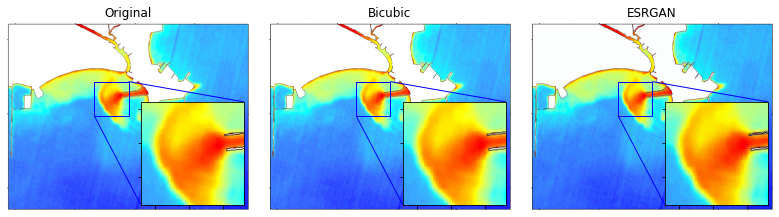

2019-03-30Rainbow
E:\jupyterDir\super-resolution\HaiyangLandsat8SST size=816 x 1056
PSNR of predict and Bicubic is 28.5190


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


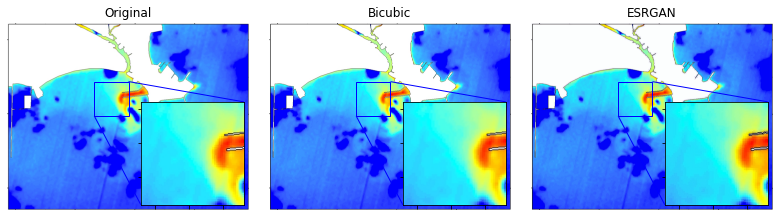

2019-04-15Rainbow
E:\jupyterDir\super-resolution\HaiyangLandsat8SST size=816 x 1056
PSNR of predict and Bicubic is 29.0987


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


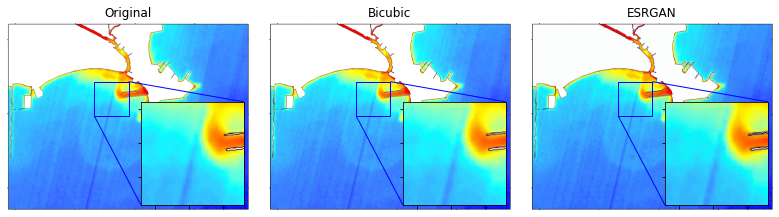

2019-05-01Rainbow
E:\jupyterDir\super-resolution\HaiyangLandsat8SST size=816 x 1056
PSNR of predict and Bicubic is 29.3276


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


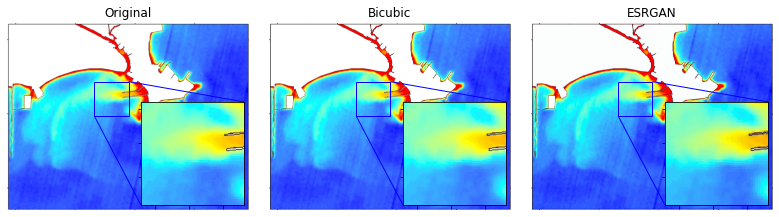

2019-06-02Rainbow
E:\jupyterDir\super-resolution\HaiyangLandsat8SST size=816 x 1056
PSNR of predict and Bicubic is 29.0222


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


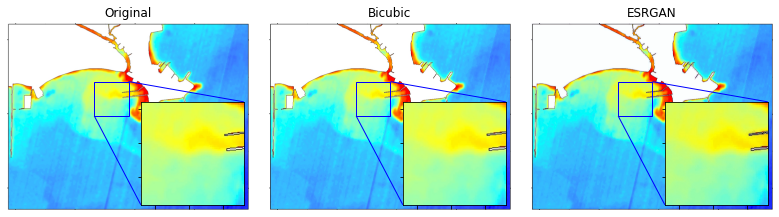

2019-09-22Rainbow
E:\jupyterDir\super-resolution\HaiyangLandsat8SST size=816 x 1056
PSNR of predict and Bicubic is 28.6205


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


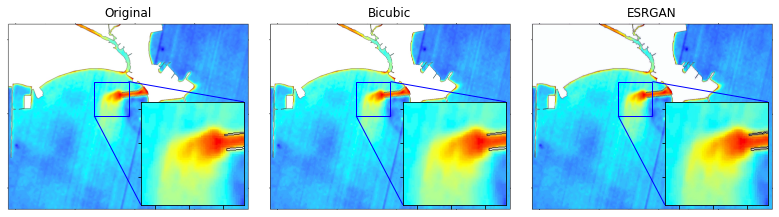

2019-10-08Rainbow
E:\jupyterDir\super-resolution\HaiyangLandsat8SST size=816 x 1056
PSNR of predict and Bicubic is 28.4109


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


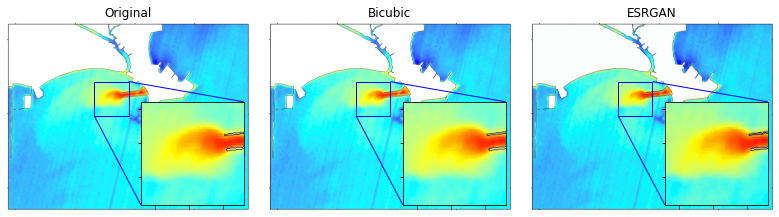

2019-10-24Rainbow
E:\jupyterDir\super-resolution\HaiyangLandsat8SST size=816 x 1056
PSNR of predict and Bicubic is 28.5155


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


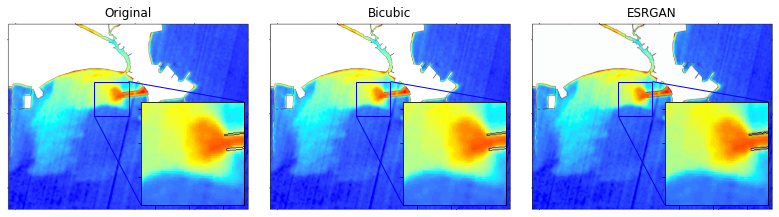

2019-11-09Rainbow
E:\jupyterDir\super-resolution\HaiyangLandsat8SST size=816 x 1056
PSNR of predict and Bicubic is 28.8643


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


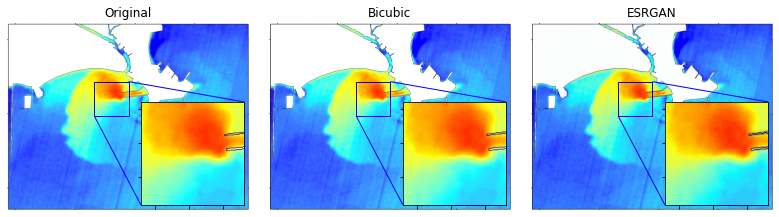

2019-12-11Rainbow
E:\jupyterDir\super-resolution\HaiyangLandsat8SST size=816 x 1056
PSNR of predict and Bicubic is 28.9479


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


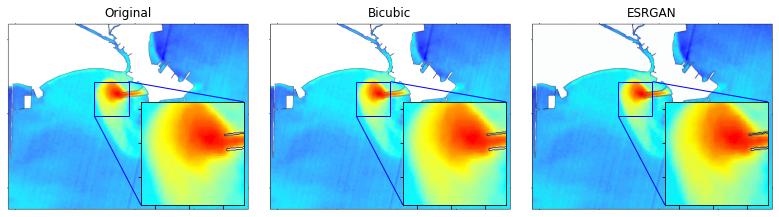

2020-01-12Rainbow
E:\jupyterDir\super-resolution\HaiyangLandsat8SST size=816 x 1056
PSNR of predict and Bicubic is 29.2647


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


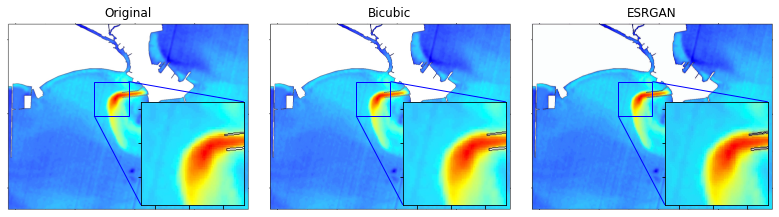

2020-03-16Rainbow
E:\jupyterDir\super-resolution\HaiyangLandsat8SST size=816 x 1056
PSNR of predict and Bicubic is 28.6981


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


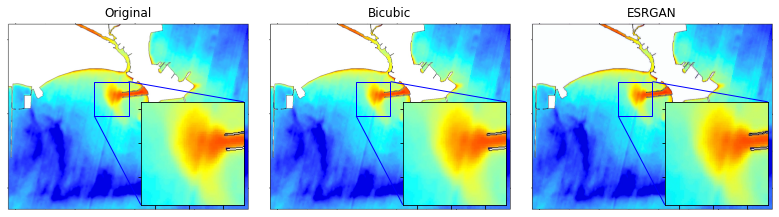

2020-06-04Rainbow
E:\jupyterDir\super-resolution\HaiyangLandsat8SST size=816 x 1056
PSNR of predict and Bicubic is 29.4447


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


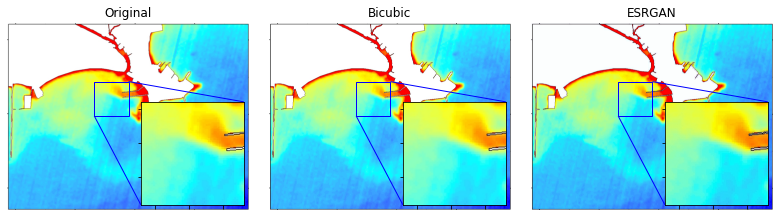

2020-06-20Rainbow
E:\jupyterDir\super-resolution\HaiyangLandsat8SST size=816 x 1056
PSNR of predict and Bicubic is 29.4430


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


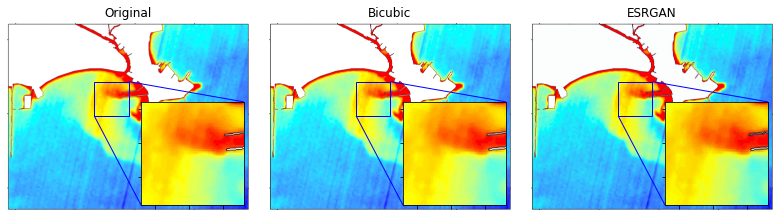

Avg. PSNR of reconstructions is 23.8353
Time Taken: 176.920883 s


In [5]:
#SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
#model = hub.load(SAVED_MODEL_PATH)
SAVED_MODEL_PATH = "E:\\jupyterDir\\super-resolution\\ESRGAN\\downModel\\esrgan-tf2_1"
model = tf.saved_model.load(SAVED_MODEL_PATH)
#dell 台式机GPU会因为显存不足而运行不下去
IMAGE_PATH = "E:\\jupyterDir\\super-resolution\\HaiyangLandsat8SST"

def getfile(path,suffix,character):
    files=os.listdir(path)
    files.sort()
    filelist=[]
    for file in files:
        if not os.path.isdir(path+file) and (character in file) and (file.endswith(suffix)):
            f_name=str(file)
            tr="\\"
            filename=path+tr+f_name
            filelist.append(filename)
    return filelist
# Defining helper functions
# Defining helper functions
def downscale_image(image):
  """
      Scales down images using bicubic downsampling.
      Args:
          image: 3D or 4D tensor of preprocessed image
  """
  image_size = []
  if len(image.shape) == 3:
    image_size = [image.shape[1], image.shape[0]]
  else:
    raise ValueError("Dimension mismatch. Can work only on single image.")

  image = tf.squeeze(
      tf.cast(
          tf.clip_by_value(image, 0, 255), tf.uint8))

  lr_image = np.asarray(
    Image.fromarray(image.numpy())
    .resize([image_size[0] // 4, image_size[1] // 4],
              Image.BICUBIC))

  lr_image = tf.expand_dims(lr_image, 0)
  lr_image = tf.cast(lr_image, tf.float32)
  return lr_image
def plot_results1(imgList,title,x1x2y1y2,loc12,location):
    plt.rcParams['figure.figsize'] = [15, 10]
    Nimg=len(imgList)+1  
    fig,__ = plt.subplots(1,2)
    fig.tight_layout()
    for index, img in enumerate(imgList):  
        """Plot the result with zoom-in area."""
        img_array = img_to_array(img)
        img_array = img_array.astype("float32") / 255.0
        # Create a new figure with a default 111 subplot.
        ax = plt.subplot(1,Nimg,index+1)
        im = ax.imshow(img_array[::-1], origin="lower",cmap="rainbow")#plt.cm.rainbow
        plt.axis('off')

        plt.title(title[index])#标注标题
        # zoom-factor: 2.0, location: upper-left=2
        axins = zoomed_inset_axes(ax, 3, loc=location)
        axins.imshow(img_array[::-1], origin="lower",cmap="rainbow")

        # Apply the x-limits.
        axins.set_xlim(x1x2y1y2[index][0], x1x2y1y2[index][1])
        # Apply the y-limits.
        axins.set_ylim(x1x2y1y2[index][2], x1x2y1y2[index][3])

        plt.yticks(visible=False)
        plt.xticks(visible=False)

        # Make the line.
        mark_inset(ax, axins, loc1=loc12[0], loc2=loc12[1], fc="none", ec="blue")#loc1=1, loc2=3
    plt.savefig(date+"_"+title[-1] + ".png",dpi=300)
    plt.show()
    
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

start = time.time()
scaleFactor=4
img_path=getfile(IMAGE_PATH ,".jpg","Rainbow") 
total_test_psnr = 0.0
for image in img_path[3:]:
    date=image.split("\\")[-1]
    date=date.rsplit(".jpg")[0]
    print(date)
    fake_image = tf.squeeze(model(preprocess_image(image)))
    ori_image = load_img(image)
    Bicubic_img = ori_image.resize((fake_image.shape[1], fake_image.shape[0]),Image.BICUBIC)
    Bicubic_img_arr = img_to_array(Bicubic_img)
    psnr = tf.image.psnr(tf.clip_by_value(fake_image, 0, 255),tf.clip_by_value(Bicubic_img_arr, 0, 255), max_val=255)
    total_test_psnr += psnr
    print("PSNR of predict and Bicubic is %.4f" % psnr)
    plot_results1([ori_image,Bicubic_img,fake_image],["Original","Bicubic","ESRGAN"],
                  [[380,530,410,560],[4*380,4*530,4*410,4*560],[4*380,4*530,4*410,4*560]],
                  [1,3],4)
print("Avg. PSNR of reconstructions is %.4f" % (total_test_psnr / len(img_path)))    
print("Time Taken: %f s" % (time.time() - start))
